In [1]:
import tensorflow as tf

In [2]:
# 래그드 상수를 일반적인 텐서로 변환하는 방법
r = tf.ragged.constant([[1, 2, 3], [1], [], [1, 2, 3, 4, 5]])

In [3]:
# 0으로 채워지지 않은 부분은 default_value를 지정하여 채울 수 있으며, shape를 지정하여 변환 후의 모양을 지정할 수 있습니다. 초과된 부분은 잘릴 것입니다.
r.to_tensor(default_value=1, shape=(4, 3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 1, 1],
       [1, 1, 1],
       [1, 2, 3]])>

In [4]:
# 희소 텐서 tensor, 희소 행렬, sparse tensor
# 행렬에서 0의 원소가 비교적 많고, 0이 아닌 원소들의 배열은 규칙성이 없습니다
# indices는 0이 아닌 위치를 나타내며,
# values는 구체적인 값들을 나타냅니다.
# dense_shape는 희소 텐서의 모양(shape)를 나타냅니다.
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]], values=[4, 5, 6], dense_shape=[3, 4])
s
# 이 코드는 3행 4열의 희소 텐서를 나타내며, 4, 5, 6의 3개의 0이 아닌 원소가 있습니다.

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [5]:
s.__str__()

'SparseTensor(indices=tf.Tensor(\n[[0 1]\n [1 0]\n [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))'

In [6]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [7]:
# 밀집 행렬로 변환됩니다
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 4, 0, 0],
       [5, 0, 0, 0],
       [0, 0, 0, 6]])>

In [8]:
# 곱셈이 가능합니다.
s * 2
# 하지만, values 속성에 있는 원래 값들의 2배만 포함됩니다.
# indices와 dense_shape 속성은 원래 희소 텐서와 동일합니다.

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 8 10 12], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [20]:
# 덧셈은 불가능합니다.
s + 1

TypeError: unsupported operand type(s) for +: 'SparseTensor' and 'int'

In [21]:
# matmul matrix multiply
# (3, 4), (4, x)
ss = tf.constant([[10, 20],
            [30, 40],
            [50, 60],
            [70, 80]])
tf.sparse.sparse_dense_matmul(s, ss)
# 희소 행렬 's'와 밀집 행렬 'ss'의 곱은 다음 결과를 얻습니다.
# 's'의 행(row) x 'ss'의 열(column)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[120, 160],
       [ 50, 100],
       [420, 480]])>

In [22]:
# 定义sparse_tensor的时候, indices最好是有序的.
s2 = tf.SparseTensor(indices=[[0, 2], [0, 1], [2, 3]], values=[1, 2, 3], dense_shape=[3, 4])
# indices 表示 非0元素的位置

In [23]:
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [24]:
# 밀집 행렬로 변환하려면,
tf.sparse.to_dense(s2)

InvalidArgumentError: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]

In [26]:
#  희소 텐서를 다시 정렬(reorder)해야 합니다.
s3 = tf.sparse.reorder(s2)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 2, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 3]])>

### 변수 (variable)

In [28]:
# 변수란 내부 값이 변경 가능한 것을 말합니다. 예를 들어, 신경망에서 학습해야 할 가중치(w)와 절편(b)은 변수입니다.
# tf.Variable을 사용하여 정의할 수 있습니다.
v = tf.Variable([[1, 2, 3], [4, 5, 6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [29]:
# 반환 값은 ndarray입니다.
v.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
# 반환 값은 변수의 값으로 생성된 텐서입니다.
v.value()

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [31]:
v.assign(v * 2)  # v = v * 2

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [32]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [34]:
v[0, 1] = 44

TypeError: 'ResourceVariable' object does not support item assignment

In [36]:
# 변수의 할당은 assign 메서드를 사용해야 합니다.
v[0, 1].assign(44)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2, 44,  6],
       [ 8, 10, 12]])>

In [38]:
v[1].assign([7, 8, 9])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2, 44,  6],
       [ 7,  8,  9]])>

In [ ]:
# 변수에 값을 할당할 때는 등호(=) 대신 assign 메서드를 사용해야 하며

In [ ]:
# TensorFlow 2.0에서는 상수(constant)와 변수(variable)만 존재합니다.

### TensorFlow의 수학 연산

In [1]:
# TensorFlow에서 수학 연산을 수행하는 두 가지 방법이 있습니다
# Python의 산술 연산자를 직접 사용합니다.
# TensorFlow에서 제공하는 수학 함수를 사용합니다.

In [39]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [40]:
a + b

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [41]:
a - b 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [45]:
# TensorFlow에서 제공하는 일부 수학 함수
tf.add(a, b)
tf.subtract(a, b)
tf.multiply(a, b)
tf.divide(a, b)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6666666666666666>

In [46]:
n = np.random.randint(0, 10, size=(3, 4))
n

<IPython.core.display.Javascript object>

array([[2, 2, 1, 8],
       [3, 5, 2, 4],
       [8, 7, 7, 1]])

In [48]:
n.sum(axis=0)

array([13, 14, 10, 13])

In [49]:
# TensorFlow에서 제공하는 집계 연산 함수들은 모두 reduce를 수행합니다.
# 또한 TensorFlow에서 제공하는 집계 함수들은 NumPy와 동일하게 작동합니다. axis를 지정하지 않으면 모든 차원에서 집계합니다.
tf.reduce_sum(n)

<tf.Tensor: shape=(), dtype=int32, numpy=50>

In [51]:
tf.reduce_sum(n, axis=0)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([13, 14, 10, 13])>

In [53]:
tf.reduce_sum(n, axis=1).numpy()

array([13, 14, 23])

In [54]:
# 행렬 곱셈
x = np.random.randint(0, 10, size=(3, 5))
y = np.random.randint(0, 10, size=(5, 4))
# matrix multiply 는 행렬 곱셈
# dot.product
tf.matmul(x, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 52,  36,  99,  71],
       [ 60,  26,  90, 120],
       [ 67,  79, 171, 143]])>

In [55]:
# 렬 곱셈의 약식은 보통 "@" 기호로 표시됩니다
x @ y

array([[ 52,  36,  99,  71],
       [ 60,  26,  90, 120],
       [ 67,  79, 171, 143]])

In [61]:
x.dot(y)

array([[ 52,  36,  99,  71],
       [ 60,  26,  90, 120],
       [ 67,  79, 171, 143]])

In [60]:
# @ 기호는 행렬의 곱셈을 나타내며, TensorFlow 및 NumPy에서 공통적으로 사용됩니다.
tf.constant(x) @ tf.constant(y)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 52,  36,  99,  71],
       [ 60,  26,  90, 120],
       [ 67,  79, 171, 143]])>

In [ ]:
# tf.dot 없습니다
tf.dot()

In [63]:
x = np.random.randint(0, 10, size=(3, 5))
y = np.random.randint(0, 10, size=(5, 4))
# multiply는 일반적인 곱셈이며, 행렬과 행렬 간에는 해당 위치의 요소를 곱합니다. 이 경우 곱셈하는 행렬의 shape가 동일해야합니다.
tf.multiply(x, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

InvalidArgumentError: Incompatible shapes: [3,5] vs. [5,4] [Op:Mul]

### TensorFlow를 사용한 선형 회귀 구현

In [ ]:
# 다음 세 단계를 통해 알고리즘을 구현합니다:
1. 알고리즘의 예측 함수를 찾습니다. y = wx + b
2. 알고리즘의 손실 함수를 찾습니다. 최소제곱법(least square)을 사용합니다.  
3. 경사하강법을 사용하여 손실을 최소화할 매개변수를 찾습니다.

In [64]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

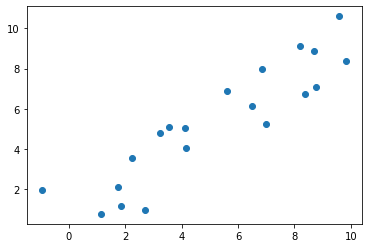

In [69]:
# 잡음 추가
x = np.linspace(0, 10, 20) + np.random.randn(20)
y = np.linspace(0, 10, 20) + np.random.randn(20)
plt.scatter(x, y)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
linear.coef_

array([0.83216446])

In [73]:
linear.intercept_

1.0326566724596873

<IPython.core.display.Javascript object>

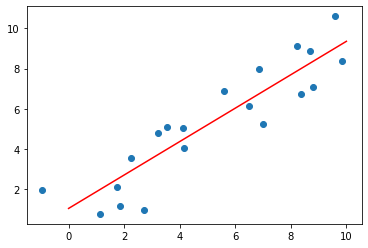

In [74]:
plt.scatter(x, y)
x_test = np.linspace(0, 10, 20)
y_test = linear.coef_[0] * x_test + linear.intercept_
plt.plot(x_test, y_test, c='r')

In [75]:
# W, B를 변수로 정의합니다.
W = tf.Variable(np.random.randn() * 0.02)
B = tf.Variable(0.)


<IPython.core.display.Javascript object>

In [ ]:
(20, 4) (4, )

In [76]:
# 예측함수의 정의함
def linear_regression(x):
    return W * x + B

In [81]:
# 손실 함수의 정의함
# 최소제곱법
def mean_square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [82]:
# 옵티마이저, 즉 경사하강 알고리즘
optimizer = tf.optimizers.SGD()

In [83]:
# 최적화 과정을 정의합니다.
def run_optimization():
    # 계산 과정을 GradientTape에 넣어 자동으로 계산이 가능합니다微分.
    with tf.GradientTape() as g:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
        
    # 기울기를 계산합니다
    gradients = g.gradient(loss, [W, B])
    
    # W와 B를 업데이트합니다.
    optimizer.apply_gradients(zip(gradients, [W, B]))
    

In [84]:
# 학습을 진행합니다.
for step in range(5000):
    # run_optimization 함수를 호출할 때마다 W, B가 업데이트됩니다.
    run_optimization()
    # 학습 과정을 표시합니다.
    # 100번 학습할 때마다 학습 과정을 출력합니다.
    if step % 100 == 0:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
        print(f'step:{step + 1}, loss: {loss}, W: {W.numpy()}, B:{B.numpy()}')

step:1, loss: 4.0779619216918945, W: 0.7080292105674744, B:0.10740362107753754
step:101, loss: 1.5519318580627441, W: 0.9074823260307312, B:0.5065191388130188
step:201, loss: 1.503877878189087, W: 0.8767268657684326, B:0.7213630080223083
step:301, loss: 1.4870562553405762, W: 0.8585302233695984, B:0.8484770059585571
step:401, loss: 1.4811676740646362, W: 0.8477639555931091, B:0.9236853718757629
step:501, loss: 1.4791061878204346, W: 0.8413940072059631, B:0.9681829214096069
step:601, loss: 1.4783846139907837, W: 0.8376252055168152, B:0.9945101737976074
step:701, loss: 1.4781320095062256, W: 0.835395336151123, B:1.0100871324539185
step:801, loss: 1.478043556213379, W: 0.8340760469436646, B:1.0193032026290894
step:901, loss: 1.4780126810073853, W: 0.8332955241203308, B:1.0247557163238525
step:1001, loss: 1.4780018329620361, W: 0.8328335881233215, B:1.0279819965362549
step:1101, loss: 1.4779980182647705, W: 0.8325603604316711, B:1.029891014099121
step:1201, loss: 1.477996587753296, W: 0.83

In [85]:
linear.coef_

array([0.83216446])

In [86]:
linear.intercept_

1.0326566724596873